In [184]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special as sp
from decimal import Decimal, getcontext

In [185]:
getcontext().prec = 600

In [186]:
def binomial_coeff_lists(lmax):
    b_c = [[Decimal(0) for i in range(lmax)] for j in range(lmax) ]
    for j in range(0,lmax):
        b_c[j][0] = Decimal(1)
        b_c[0][j] = Decimal(1)
        b_c[j][j] = Decimal(1)
    for k in range(1,lmax):
        for s in range(1,k):
            b_c[k][s] = Decimal(b_c[k-1][s]) + Decimal(b_c[k-1][s-1])
    return b_c

In [225]:
def compute_terms(nu,rho,l_max,t_max,t_min):
    frac = Decimal(nu/rho)
    gamma = Decimal(1-nu/rho)
    norm = Decimal(t_max - t_min)
    const = ((Decimal(rho-nu))**(Decimal(frac)))*Decimal(frac)
    const_array = [(Decimal(-1)**(i))*Decimal(const**(i+1)) for i in range(0,l_max)]
    values = [Decimal(1/norm) for i in range (0,l_max)]
    if(nu%(rho-nu)==0):
        print('divergenza!')
        idx_div = int(nu/(rho-nu))
        times_array_pre_div = [ ((Decimal(t_min)**(-Decimal(gamma*(i+1))+Decimal(1)))-(Decimal(t_max)**(-Decimal(gamma*(i+1))+Decimal(1))))/(Decimal(gamma*(i+1)-1)) for i in range(0,idx_div)]
        times_array_pre_div.append(Decimal(np.log(t_max/t_min)))
        times_array_after_div = [ ((Decimal(t_min)**(-Decimal(gamma*(i+1))+Decimal(1)))-(Decimal(t_max)**(-Decimal(gamma*(i+1))+Decimal(1))))/(Decimal(gamma*(i+1)-1)) for i in range(idx_div+1,l_max)]
        times_array = times_array_pre_div+times_array_after_div
    
    else:
        times_array = [ ((Decimal(t_min)**(-Decimal(gamma*(i+1))+Decimal(1)))-(Decimal(t_max)**(-Decimal(gamma*(i+1))+Decimal(1))))/(Decimal(gamma*(i+1)-1)) for i in range(0,l_max)]
        
    for idx in range(0,l_max):
        values[idx] = const_array[idx]*times_array[idx]*values[idx]
    return values

In [226]:
def probability_distribution(nu,rho,l_max,t_max,t_min):
    binomial_coefficients = binomial_coeff_lists(l_max)
    vals = compute_terms(nu,rho,l_max,t_max,t_min)
    lengths= np.arange(1,l_max+1)
    pdf_values = [Decimal(0) for i in range(0,l_max+1)]
    for length in lengths:
        for j in range (0,int(length)):
            pdf_values[int(length)] += Decimal(binomial_coefficients[int(length-1)][j])*Decimal(vals[j])        
    return lengths,pdf_values

In [227]:
x,y = probability_distribution(4,5,500,10000000,1000000)

divergenza!


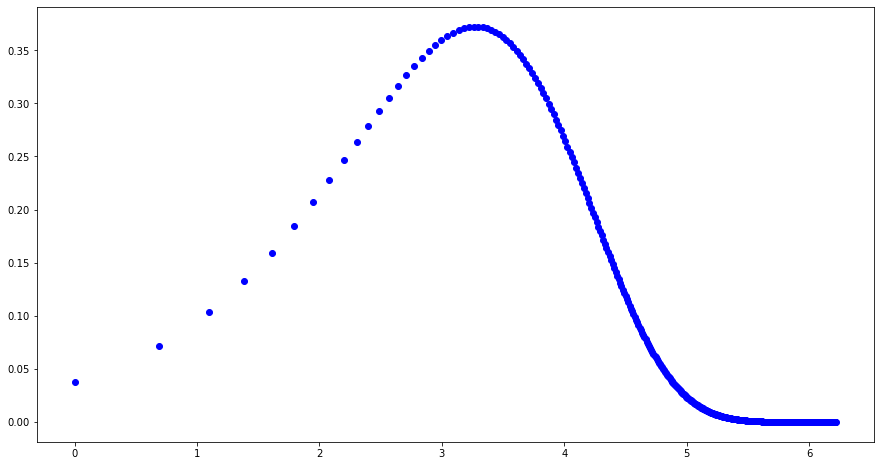

In [229]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot()
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.scatter(np.log(x),y[1:]*x,color = 'b')
#ax.scatter(heaps_2007.T[0][:],heaps_2007.T[1][:], color ='brown')



plt.show()